<a href="https://colab.research.google.com/github/SujitbMusale/Airbnb-EDA/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [5]:
# we discused about project

Step-1: import important libraries  pandas, matplotlib 

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Step-2:mount drive on google colab

In [7]:
from google.colab import drive  
drive.mount('/content/drive')

Mounted at /content/drive


Step-3 : Read given csv file for airbnb project from drive

In [8]:
airbnb_df = pd.read_csv('/content/drive/MyDrive/almabetter/Airbnb NYC 2019.csv')

Step-4: observe some details like what are the heading are there, what is size of data and type of data that has being given

In [9]:
airbnb_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
airbnb_df.shape

(48895, 16)

In [11]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Step-7: we will drop the geographical cordinates column for this project as we are not working on them.

In [12]:
airbnb_df.drop(['latitude','longitude'],axis = 1, inplace =True)

Step-5: Here "host_name","last_review","reviews_per_month" are having some null values,so lets drop that null values from the data

In [13]:
airbnb_df_non_null= airbnb_df.dropna()

In [14]:
airbnb_df_non_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   room_type                       38821 non-null  object 
 7   price                           38821 non-null  int64  
 8   minimum_nights                  38821 non-null  int64  
 9   number_of_reviews               38821 non-null  int64  
 10  last_review                     38821 non-null  object 
 11  reviews_per_month               38821 non-null  float64
 12  calculated_host_listings_count  

Step-6: lets check the room type avilabel in the given data and will check the count of same and if any room type containing less bookings we will drop it out.

In [15]:
airbnb_df_non_null['room_type'].value_counts(ascending = False)

Entire home/apt    20321
Private room       17654
Shared room          846
Name: room_type, dtype: int64

In [16]:
airbnb = airbnb_df_non_null[airbnb_df_non_null.room_type != 'Shared room']
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,2019-06-22,0.59,1,129




*   some obs are 3 types of rooms avialbe among them shared room are very less as compaired to entire home/apt and privet room
*   so we droped the shared room type from data set



# Question-1
**What can we learn about different hosts and areas?**



Step-7: we will find out the total number of host present and also find out first 20 potensial host.

In [28]:
unique_host = airbnb['host_name'].nunique()
unique_host

9786

In [29]:
host_count = airbnb['host_name'].value_counts()
frequently_hosting_host =host_count[host_count>10]
unique_frequently_hosting_host =frequently_hosting_host.nunique()

In [32]:
unique_frequently_hosting_host_percentage = round((unique_frequently_hosting_host/unique_host)*100)
unique_frequently_hosting_host_percentage

1

Step-8:
we are finding the area from given data which are having higher number 
of booking.



In [33]:
unique_area = airbnb['neighbourhood_group'].value_counts()
unique_area

Manhattan        16265
Brooklyn         16149
Queens            4420
Bronx              832
Staten Island      309
Name: neighbourhood_group, dtype: int64

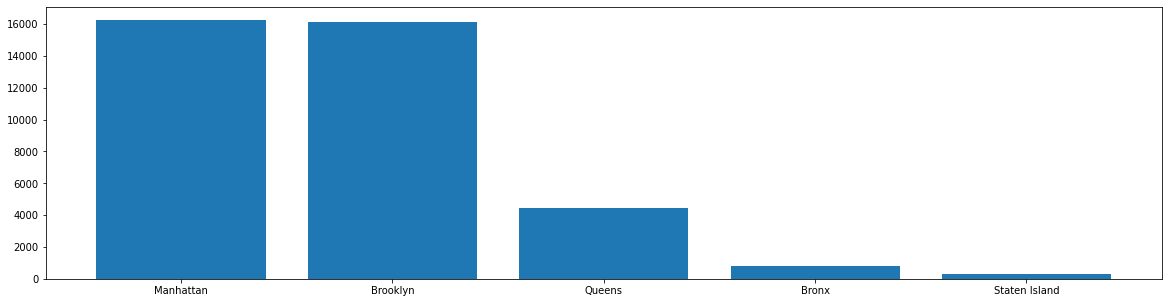

In [34]:
plt.figure(figsize=(20,5))
plt.bar(unique_area.keys(),unique_area)
plt.show()

From this bar plot can say that the maximum nuber of hosts and rooms present in Manhattan and Brooklyn as compaired to Queens ,Bronx And Staten Island so if any one has to open any service have to open in Queens,Bronx and Staten Island have a less compitations.

In [22]:
area_group = airbnb.groupby(['neighbourhood_group'])

In [23]:
area_group.mean()['price']

neighbourhood_group
Bronx             80.728365
Brooklyn         122.828163
Manhattan        182.306117
Queens            96.860633
Staten Island     90.488673
Name: price, dtype: float64

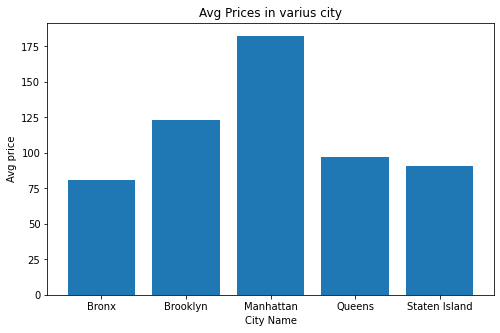

In [344]:
plt.figure(figsize=(8,5))
plt.bar(area_group.mean()['price'].keys(),area_group.mean()['price'])
plt.title('Avg Prices in varius city')
plt.xlabel('City Name')
plt.ylabel('Avg price')
plt.show()

In [43]:
room_type_group =airbnb.groupby(['room_type'])

In [46]:
for neighbourhood_group,room_type_group in room_type_group:
     neighbourhood_group

ValueError: ignored